VAE para representação latente dos dados sintéticos

link: https://github.com/arkanivasarkar/EEG-Data-Augmentation-using-Variational-Autoencoder

Paper: https://arxiv.org/pdf/1611.08024.pdf


##Loading libraries

In [ ]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=c25ca8212e07451ee7e9ff4fdf2a76176804920f12b1dbdc8a4da46d445f9926
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
!pip install braindecode==0.7
!pip install moabb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.4/184.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.8/563.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 11.5 MB/s eta 0:00:00
  Created wheel for pyriemann: filename=pyriemann-0.5-py2.py3-none-any.whl size=107752 sha256=67425990760dc72171f7f8ecaefebadc0f3ee9e9ab2c01215bb0cbca66b35fa1
  Stored in directory: /root/.cache/pip/wheels/84/86/79/622e9c1dc93

In [ ]:
!pip install umap-learn
import umap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=5c2a7026364e147fc6cb945630bee56f4fc3ba0048b07344ef144f941e08d349
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms, utils
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

torch.manual_seed(0) # Set for our testing purposes, please do not change!

from braindecode.datasets import MOABBDataset
from braindecode.preprocessing import (
    exponential_moving_standardize, preprocess, Preprocessor)
from braindecode.preprocessing import \
    create_windows_from_events, create_fixed_length_windows
from sklearn.preprocessing import scale as standard_scale

<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
/usr/local/lib/python3.10/dist-packages/moabb/pipelines/__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(


In [ ]:
#bibliotecas para carregar o dataset e para arquitetura da rede
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, BatchNormalization, LeakyReLU, Dense, Lambda, Reshape, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras import backend as K

In [ ]:
#bibliotecas para visualização do espaço latente
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


## Reading the data

In [ ]:
# Carregar os dados do arquivo
x_gen = torch.load('/content/drive/MyDrive/Unicamp/23.2/DL para sintese de sinais/Projetos computacionais/A1 - Projeto Final/Códigos/dados_gerados_todas_labels.pt') #dados sintéticos do sujeito 3
x_gen = x_gen.detach().numpy()

# Criar os rótulos
y_gen = np.concatenate((np.zeros((288,1)),np.ones((288,1)),2*np.ones((288,1)),3*np.ones((288,1))))

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
X_train, X_test, y_train, y_test  = train_test_split(x_gen,y_gen,test_size=0.2, shuffle= True, stratify = y_gen)

In [ ]:
min_val = tf.reduce_min(X_train)
max_val = tf.reduce_max(X_train)

X_train = (X_train - min_val) / (max_val - min_val) #Normalizando os dados
X_test = (X_test - min_val) / (max_val - min_val)

X_train = tf.cast(X_train, tf.float32) #Lança um tensor para um novo tipo.
X_test = tf.cast(X_test, tf.float32)

##VAE

In [ ]:
# VAE model
input_shape=(X_train.shape[1:])
batch_size = 32
kernel_size = 5
filters = 16
latent_dim = 2
epochs = 1000

# reparameterization
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon




# encoder
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs

filters = filters* 2
x = Conv2D(filters=filters,kernel_size=(1, 50),strides=(1,25),padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)


filters = filters* 2
x = Conv2D(filters=filters,kernel_size=(eletrodos, 1),padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.2)(x)

shape = K.int_shape(x)

x = Flatten()(x)
x = Dense(16, activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)
z_log_var = z_log_var + 1e-8

# reparameterization
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 1, 22, 400)]         0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 1, 1, 32)             640032    ['encoder_input[0][0]']       
                                                                                                  
 batch_normalization (Batch  (None, 1, 1, 32)             128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 leaky_re_lu (LeakyReLU)     (None, 1, 1, 32)             0         ['batch_normalization[0]

In [ ]:
# decoder
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(shape[1] * shape[2] * shape[3], activation='relu')(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

x = Conv2DTranspose(filters=filters,kernel_size=(eletrodos, 1),activation='relu',)(x)
x = BatchNormalization()(x)

filters = filters// 2
x = Conv2DTranspose(filters=filters,kernel_size=(1, 400),activation='relu',strides=(1,25))(x)
x = BatchNormalization()(x)

filters = filters// 2
outputs = Conv2DTranspose(filters=1,kernel_size=kernel_size,padding='same',name='decoder_output')(x)
outputs = Reshape((1,eletrodos,400))(outputs)

decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 64)                192       
                                                                 
 reshape (Reshape)           (None, 1, 1, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 22, 1, 64)         90176     
 anspose)                                                        
                                                                 
 batch_normalization_2 (Bat  (None, 22, 1, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 22, 400, 32)       8192

In [ ]:
# VAE model (merging encoder and decoder)
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')
vae.summary()

Model: "vae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 1, 22, 400)]      0         
                                                                 
 encoder (Functional)        [(None, 2),               686644    
                              (None, 2),                         
                              (None, 2)]                         
                                                                 
 decoder (Functional)        (None, 1, 22, 400)        910785    
                                                                 
Total params: 1597429 (6.09 MB)
Trainable params: 1597045 (6.09 MB)
Non-trainable params: 384 (1.50 KB)
_________________________________________________________________


In [ ]:
#optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.5, beta_2=0.999)

# compiling vae
vae.compile(optimizer=optimizer, loss= 'mse', metrics = 'accuracy')
vae.summary()

Model: "vae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 1, 22, 400)]      0         
                                                                 
 encoder (Functional)        [(None, 2),               686644    
                              (None, 2),                         
                              (None, 2)]                         
                                                                 
 decoder (Functional)        (None, 1, 22, 400)        910785    
                                                                 
Total params: 1597429 (6.09 MB)
Trainable params: 1597045 (6.09 MB)
Non-trainable params: 384 (1.50 KB)
_________________________________________________________________


In [ ]:
# fit vae model
history = vae.fit(X_train,X_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_test, X_test))

Epoch 1/1000
29/29 [==============================] - 16s 78ms/step - loss: 0.1309 - accuracy: 0.0288 - val_loss: 0.3003 - val_accuracy: 0.0039
Epoch 2/1000
29/29 [==============================] - 0s 16ms/step - loss: 0.0132 - accuracy: 0.0452 - val_loss: 0.2977 - val_accuracy: 0.0161
Epoch 3/1000
29/29 [==============================] - 0s 16ms/step - loss: 0.0076 - accuracy: 0.0534 - val_loss: 0.2945 - val_accuracy: 0.0142
Epoch 4/1000
29/29 [==============================] - 0s 15ms/step - loss: 0.0080 - accuracy: 0.0537 - val_loss: 0.2912 - val_accuracy: 0.0211
Epoch 5/1000
29/29 [==============================] - 0s 16ms/step - loss: 0.0042 - accuracy: 0.0635 - val_loss: 0.2867 - val_accuracy: 0.0401
Epoch 6/1000
29/29 [==============================] - 0s 16ms/step - loss: 0.0048 - accuracy: 0.0656 - val_loss: 0.2837 - val_accuracy: 0.0457
Epoch 7/1000
29/29 [==============================] - 0s 16ms/step - loss: 0.0038 - accuracy: 0.0671 - val_loss: 0.2774 - val_accuracy: 0.063

In [ ]:
caminho = '/content/drive/MyDrive/Unicamp/23.2/DL para sintese de sinais/Projetos computacionais/A1 - Projeto Final/Códigos/'
# Salvar o modelo
vae.save(caminho+'modelo_vae_gerados')
# Salvar os pesos
vae.save_weights(caminho+'pesos_vae_gerados')


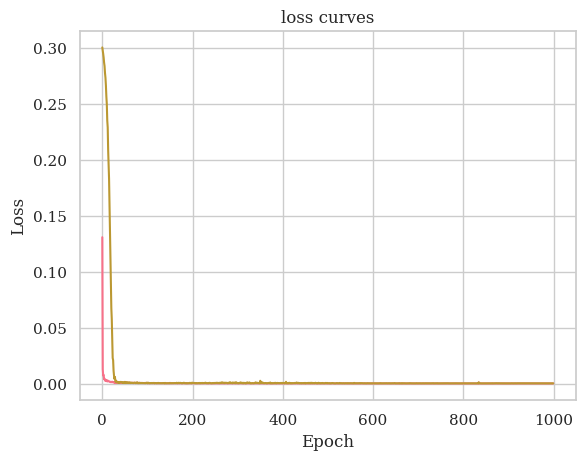

In [ ]:
# loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

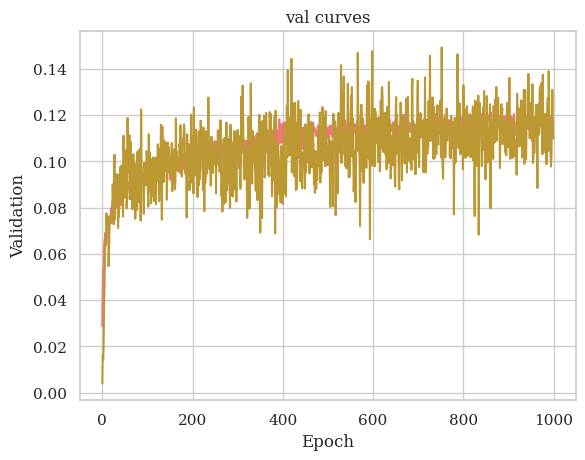

In [ ]:
# loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('val curves')
plt.ylabel('Validation')
plt.xlabel('Epoch')
plt.show()

## Espaço latente

In [ ]:
# 2D plot of the classes in latent space
#loaded_encoder = loaded_vae.get_layer('encoder')
#latent_space, _, _ = loaded_encoder.predict(X_test,batch_size=32)
latent_space, _, _ = encoder.predict(X_test,batch_size=32)

8/8 [==============================] - 0s 3ms/step


A figura abaixo mostra o espaço latente do dados gerados

In [ ]:
# Aplicar K-means
num_clusters = 4  # Número de clusters igual ao número de labels
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(latent_space)

reducer = umap.UMAP(n_neighbors=10,min_dist=0.5) #50 e 0.5
embedding = reducer.fit_transform(latent_space)

# Visualizar UMAP
import plotly.express as px
proj = pd.DataFrame(embedding)
proj.columns = ["componente_1", "componente_2"]
proj["labels"] = y_train[:231]
fig = px.scatter(proj, x='componente_1', y='componente_2', color = cluster_labels, width=800)
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
